In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "RKBRBWsdBpQ1KdyMXvv3sLQYa"
Consumer_Secret_Key = "n3suc4b3Vzlyilnh86EvNKU8F2BmOyDhXq2ceWXKsLvnqYl25u"
Access_Token = "946509368010215424-XgSzYei9mWXtMim5YMBQaUX0HyWm2cH"
Access_Token_Secret = "U0yUmaVDmvZdzoihRO78OZIDupfaDLA5PaEVFfGsdiB43"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [4]:
    posts = tweepy.Cursor(api.user_timeline,screen_name="BarackObama",count=None,since_id=None,max_id=None,trim_user=True,exclude_replies=True,contributor_details=False,include_entities=False).items(50);


In [5]:
df = pd.DataFrame(data=[tweet.text for tweet in posts], columns=['Tweet'])

Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities


In [6]:
for col in df.columns:
    print(col)

Tweet


In [7]:
df.head()


,Tweet
0,"When Harry Reid was nearing the end, his wife ..."
1,Congrats to all the scientists and engineers i...
2,"Archbishop Desmond Tutu was a mentor, a friend..."
3,"Merry Christmas, everybody! This year, I got a..."
4,RT @HHSGov: Dr. Fauci and former President Oba...


In [8]:
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [11]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [12]:
df

,Tweet
0,"When Harry Reid was nearing the end, his wife ..."
1,Congrats to all the scientists and engineers i...
2,"Archbishop Desmond Tutu was a mentor, a friend..."
3,"Merry Christmas, everybody! This year, I got a..."
4,Dr. Fauci and former President Obama visited K...
5,I thought I knew Green Eggs and Ham better tha...
6,We've seen communities across the country ste...
7,Proud of the South Side Wolfpack team for all ...
8,I'm inspired by the stories of progress that c...
9,"Over the next few days, I'll share my annual l..."


In [13]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [14]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [15]:
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

In [16]:
df

,Tweet,Subjectivity,Polarity
0,"When Harry Reid was nearing the end, his wife ...",0.000000,0.000000
1,Congrats to all the scientists and engineers i...,1.000000,0.800000
2,"Archbishop Desmond Tutu was a mentor, a friend...",0.250000,0.166667
3,"Merry Christmas, everybody! This year, I got a...",0.500000,-0.187500
4,Dr. Fauci and former President Obama visited K...,0.450000,0.150000
5,I thought I knew Green Eggs and Ham better tha...,0.540000,0.220000
6,We've seen communities across the country ste...,0.000000,0.000000
7,Proud of the South Side Wolfpack team for all ...,0.770833,0.217708
8,I'm inspired by the stories of progress that c...,0.454545,0.136364
9,"Over the next few days, I'll share my annual l...",0.366667,0.100000


In [15]:
allwords = ' '.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allwords)

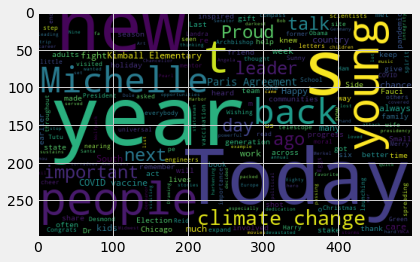

In [16]:
plt.imshow(wordCloud)
plt.show()

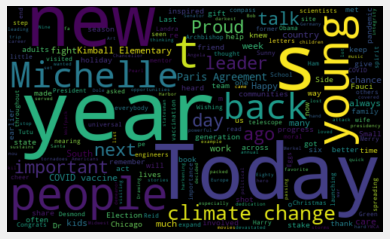

In [17]:
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
def getAnalysis(score): 

    if score < 0:
        return 'Negative' 
    elif score == 0: 
        return 'Neutral' 
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [19]:
df

,Tweet,Subjectivity,Polarity,Analysis
0,"When Harry Reid was nearing the end, his wife ...",0.000000,0.000000,Neutral
1,Congrats to all the scientists and engineers i...,1.000000,0.800000,Positive
2,"Archbishop Desmond Tutu was a mentor, a friend...",0.250000,0.166667,Positive
3,"Merry Christmas, everybody! This year, I got a...",0.500000,-0.187500,Negative
4,Dr. Fauci and former President Obama visited K...,0.450000,0.150000,Positive
5,I thought I knew Green Eggs and Ham better tha...,0.540000,0.220000,Positive
6,We've seen communities across the country ste...,0.000000,0.000000,Neutral
7,Proud of the South Side Wolfpack team for all ...,0.770833,0.217708,Positive
8,I'm inspired by the stories of progress that c...,0.454545,0.136364,Positive
9,"Over the next few days, I'll share my annual l...",0.366667,0.100000,Positive


In [20]:
print(' Printing negative tweets:\n') 
j=1 
sortedDF = df.sort_values(by=['Polarity'] , ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweet'][i])
        print()
        j=j+1 

 Printing negative tweets:

1) Merry Christmas, everybody! This year, I got a little help spreading holiday cheer from Sunny. Wishing you all a pe… 

2) The epidemic of gun violence in America has gotten worse during the pandemic. This article points to the ways in wh… 

3) In a country as large and diverse as ours, progress can often feel frustrating and slow, with small victories accom… 

4) Climate change isn’t a distant environmental issue—it’s already having an immediate impact on our lives, including… 

5) When you look at the history of big social movements, they’re usually started and sustained by young people who put… 



In [21]:
print('Printing Positive tweets:\n') 
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Tweet'][i])
        print()
        j=j+1 

Printing Positive tweets:

1) Congrats to all the scientists and engineers involved with launching this once-in-a-generation telescope! Proud my… 

2) Archbishop Desmond Tutu was a mentor, a friend, and a moral compass for me and so many others. A universal spirit,… 

3) Dr. Fauci and former President Obama visited Kimball Elementary School to talk about the importance of COVID vaccines for kids…

4) I thought I knew Green Eggs and Ham better than most people, but at Kimball Elementary’s vaccination site earlier t… 

5) Proud of the South Side Wolfpack team for all their hard work and dedication this season! 

6) I'm inspired by the stories of progress that came from 2021—especially the example set by a new generation of young… 

7) Over the next few days, I'll share my annual list of favorite books, music, and movies. Art always sustains and nou… 

8) Last week, powerful tornadoes devastated communities across the Midwest and South. Michelle and I are thinking of t… 

9) Michelle and 

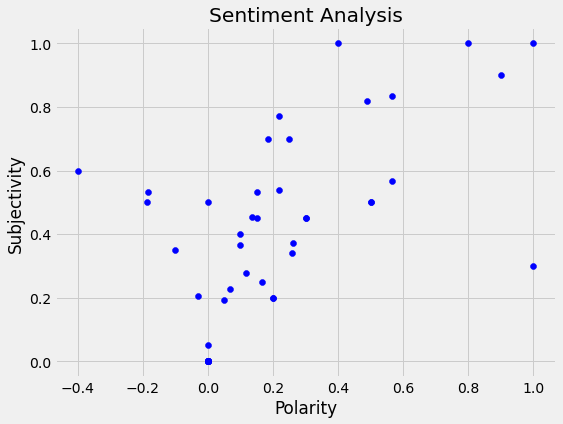

In [22]:
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i],color='Blue')
    #plt.scatter(x,y,color)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [23]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
ptweets

1     Congrats to all the scientists and engineers i...
2     Archbishop Desmond Tutu was a mentor, a friend...
4     Dr. Fauci and former President Obama visited K...
5     I thought I knew Green Eggs and Ham better tha...
7     Proud of the South Side Wolfpack team for all ...
8     I'm inspired by the stories of progress that c...
9     Over the next few days, I'll share my annual l...
12    Last week, powerful tornadoes devastated commu...
13    Michelle and I loved being back in Chicago las...
14    As Chancellor, Angela Merkel served with integ...
20    Shots are never fun, but the kids I met at Kim...
22    Getting our kids fully vaccinated is the best ...
23    I’m always inspired by young leaders like Rach...
24    From our family to yours, Happy Hanukkah and C...
26    Happy Thanksgiving! Michelle and I send our wa...
27    Happy birthday to my friend and my brother, ! ...
29    In 2011, my Administration made a pledge to pr...
31    The newest cohort of  Africa Leaders will 

In [24]:
round((ptweets.shape[0]/df.shape[0])*100,1)

58.0

In [25]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
ntweets

3     Merry Christmas, everybody! This year, I got a...
30    The epidemic of gun violence in America has go...
42    In a country as large and diverse as ours, pro...
43    Climate change isn’t a distant environmental i...
44    When you look at the history of big social mov...
Name: Tweet, dtype: object

In [26]:
round((ntweets.shape[0]/df.shape[0])*100,1)



10.0

In [27]:
df['Analysis'].value_counts()

Positive    29
Neutral     16
Negative     5
Name: Analysis, dtype: int64

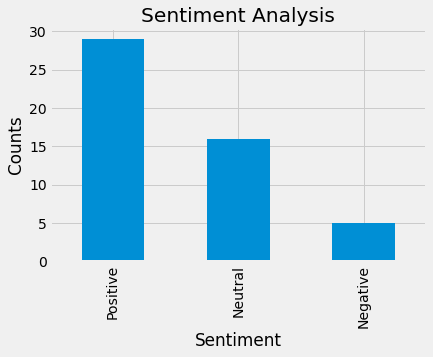

In [28]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

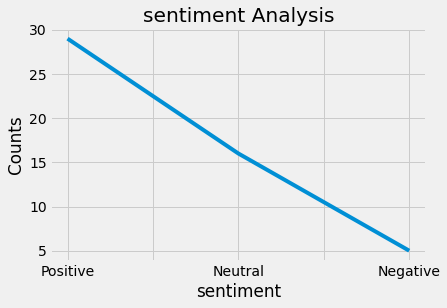

In [29]:
plt.title('sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()